In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('ex1data2.txt',names = ['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [26]:
# 特征归一化

In [27]:
def normalize_feature(data):
    return (data - data.mean())/data.std()

In [28]:
data = normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


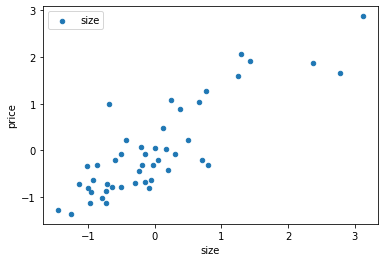

In [29]:
data.plot.scatter('size','price',label = 'size')
plt.show()

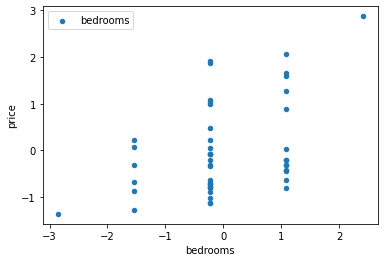

In [30]:
data.plot.scatter('bedrooms','price',label = 'bedrooms')
plt.show()

In [31]:
# 添加全为1一列
data.insert(0,'ones',1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [32]:
# 构造数据集
X= data.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [33]:
y = data.iloc[:,-1]

In [34]:
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [35]:
# datafrme 转数组

In [36]:
X = X.values
X.shape

(47, 3)

In [37]:
y = y.values
y.shape

(47,)

In [38]:
y = y.reshape(47,1)
y.shape

(47, 1)

In [39]:
# 构造损失函数

In [40]:
def costFunction(X,y,theta):
    inner = np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))

In [41]:
theta = np.zeros((3,1))

In [42]:
cost_init = costFunction(X,y,theta)
cost_init

0.48936170212765967

In [43]:
def gradientDencent( X, y, theta,alpha ,iters,isprint = False):
    costs = []
    for i in range(iters):
        theta = theta-(X.T @ (X @ theta - y))*alpha/len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)

        if i % 100 == 0:
            if isprint==True:
                print(cost)

    return theta,costs

# 不同的alpha下的效果

In [44]:
candinate_alpha = [0.0003,0.003,0.03,0.0001,0.001,0.01]
iters = 2000

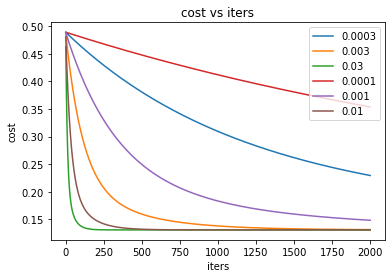

In [45]:
fig,ax = plt.subplots()
for alpha in candinate_alpha:
    _,costs = gradientDencent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label = alpha)
    ax.legend()

ax.set(xlabel='iters',ylabel = 'cost',title = 'cost vs iters')
plt.show()